# Hospital Readmission(1999-2008)

In [73]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Reading the csv
df = pd.read_csv(r'C:\Users\Admin\diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [75]:
#check for null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Preprocessing(cleaning)

from the above df we can see there is no null values in the data 
but rom the document provided we know there is null values so lets check each row individually

In [76]:
p=len(df.patient_nbr.unique())
print(f"so we have {p} number of unique patients")

so we have 71518 number of unique patients


In [77]:
# Looking for unique values in weight
df["weight"].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [78]:
df["payer_code"].unique()

array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [79]:
df["medical_specialty"].unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

all the "?" here are undefined or null values lets replace it with nan

In [80]:
df.replace("?",np.NaN,inplace=True)

# handling null values


1. If missing data < 3% use drop na
2. If missing data 3% to 40% use fill missing value
3. If missing data > 40% use dropping the column

<AxesSubplot:>

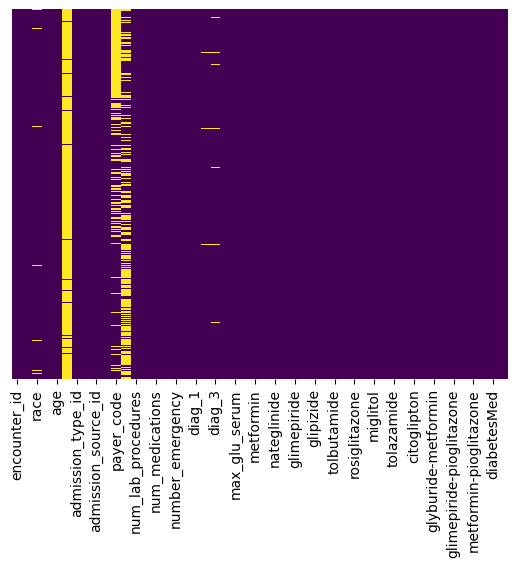

In [81]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [82]:
#so lets check percentage of the null values
df.isna().sum()*100/len(df)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [83]:
# Dropping columns who have null values more than 40% or nearby
df.drop(columns=["weight","payer_code","medical_specialty"],inplace=True)

In [84]:
# Dropping all null values
df.dropna(inplace=True)

In [85]:
# No null values present in the current Dataframe
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

<AxesSubplot:>

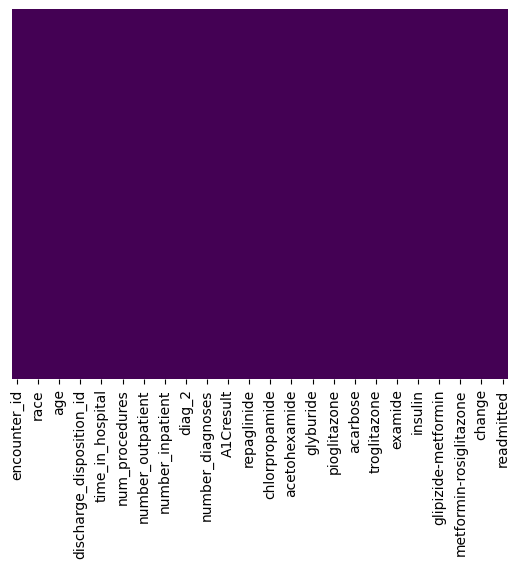

In [86]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [87]:
# Data cleaning by replacing irrelevant values in the data
df['age'] = df['age'].str.replace('[', '').str.replace(')', '')

from the above table we have to drop all the coloums with ids cause it is not required in the eda process

In [88]:
df.drop('citoglipton', axis=1, inplace=True) 
df.drop('examide', axis=1, inplace=True)   
df.drop('metformin-rosiglitazone', axis=1, inplace=True)
#dropping duplicates

# data observation

If we carefully look at the data we can see that there is inpatients outpatients and emergency so here using this data we can carefully look and the data and see how many patients have been readmitted multiple times

In [89]:
# Summing all the values of the the columns in a new column
df["patient_visit_byencounter"] = df.number_outpatient+df.number_emergency+df.number_inpatient

In [90]:
sum_df = df.groupby(df.patient_nbr)["number_outpatient","number_emergency","number_inpatient"].sum()

In [91]:
sum_df["patient_visit"] = sum_df.number_outpatient+sum_df.number_emergency+sum_df.number_inpatient

In [92]:
# Maximum number of times a Patient has visited the Hospital in each Encounter
print(f"Max count of Patient visits in one encounter is {df.patient_visit_byencounter.max()} times")

Max count of Patient visits in one encounter is 80 times


In [93]:
# Summing all the values of the columns in a new column by grouping on patient_id
df["patient_visit_byid"] = sum_df.number_outpatient+sum_df.number_emergency+sum_df.number_inpatient

In [94]:
# Maximum number of times a Patient has visited the Hospital throughout the tenure of 9 years
print(f"Max count of Patient visits in tenure of 9 years is {sum_df.patient_visit.max()} times")

Max count of Patient visits in tenure of 9 years is 540 times


# Insights and Visualization

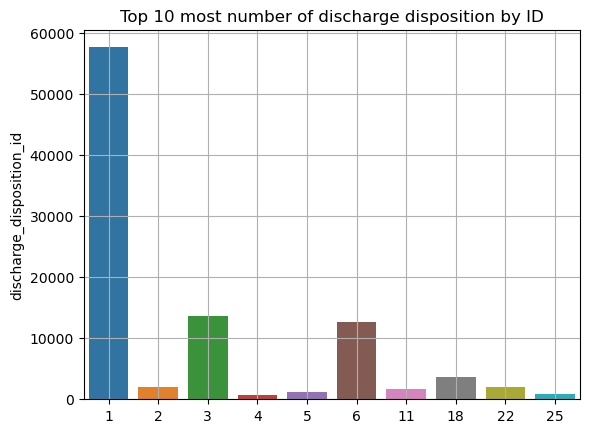

In [95]:
sns.barplot(y=df['discharge_disposition_id'].value_counts().head(10),x=df['discharge_disposition_id'].value_counts().head(10).index)
plt.title('Top 10 most number of discharge disposition by ID')
plt.grid()

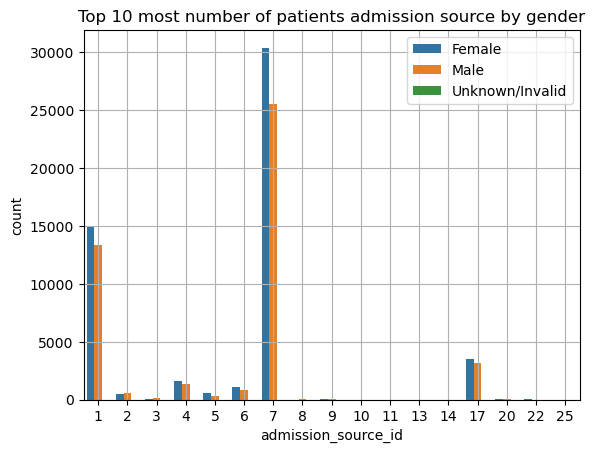

In [96]:
# Graph showing top 10 most number of patients' admission source by gender
sns.countplot(data=df,x='admission_source_id',hue='gender')
plt.legend(loc='upper right')
plt.title('Top 10 most number of patients admission source by gender')
plt.grid()

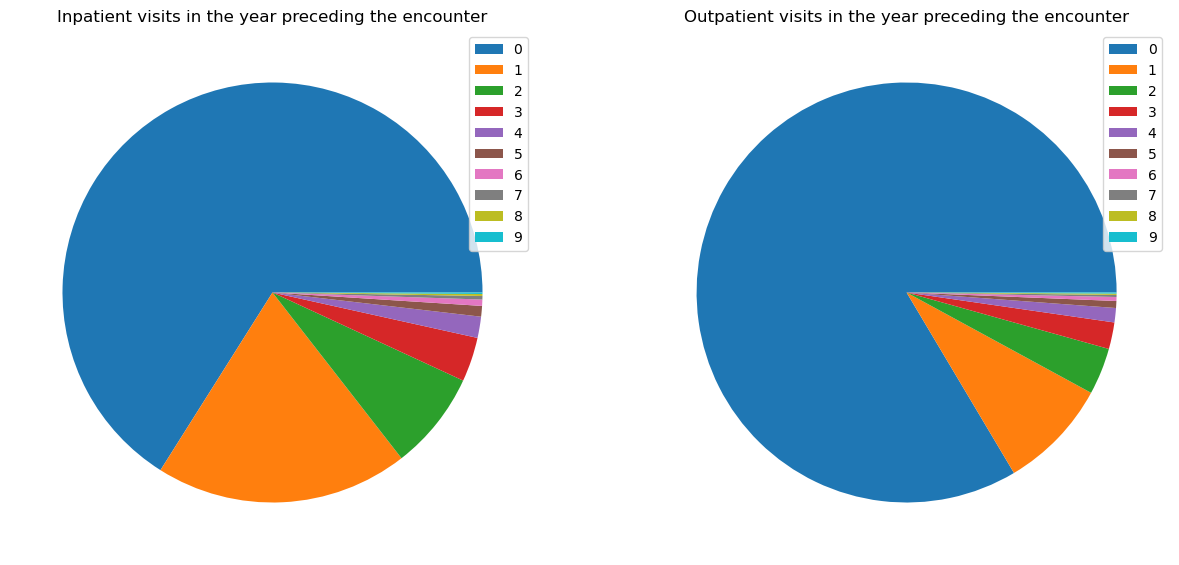

In [97]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,2)
plt.pie(df['number_outpatient'].value_counts().head(10))
plt.title('Outpatient visits in the year preceding the encounter')
plt.legend(labels=df['number_outpatient'].value_counts().index,loc='best')

plt.subplot(2,2,1)
plt.pie(df['number_inpatient'].value_counts().head(10))
plt.title('Inpatient visits in the year preceding the encounter')
plt.legend(labels=df['number_inpatient'].value_counts().index)

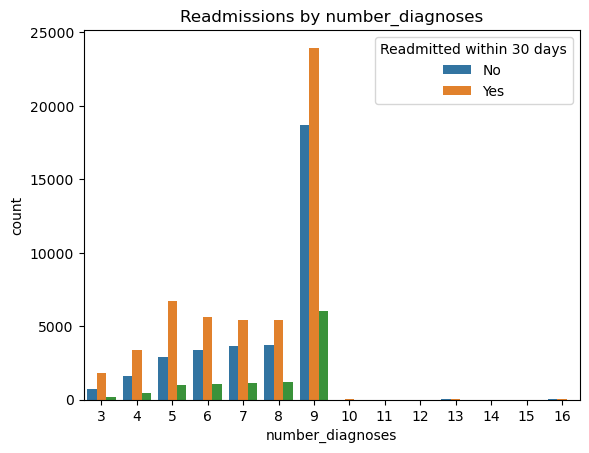

In [98]:
sns.countplot(x = 'number_diagnoses', hue = 'readmitted', data = df)
plt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.title('Readmissions by number_diagnoses')
plt.show();

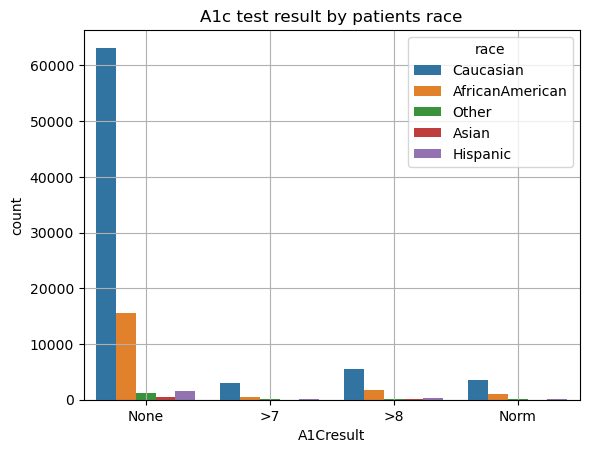

In [99]:
# Graph showing the A1c test result range of patients by their race.
sns.countplot(data=df,x='A1Cresult',hue='race')
plt.title('A1c test result by patients race')
plt.grid()

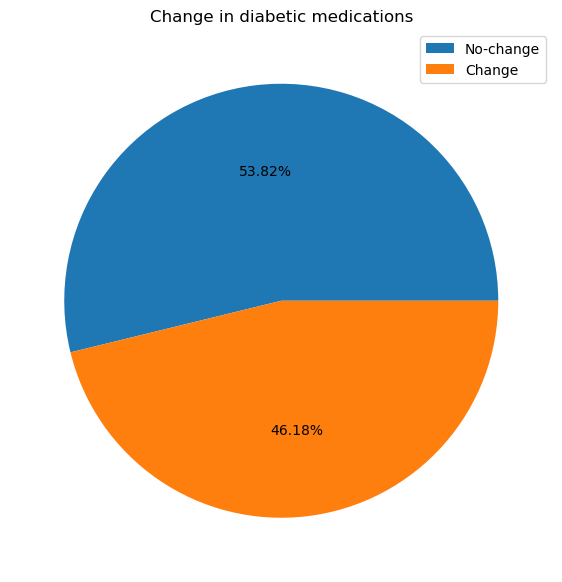

In [100]:
# Plot showing the number of patients who had a change in their diabetic medication vs. patients with no-change.
plt.figure(figsize=(7,8))
plt.pie(df['change'].value_counts(),autopct='%.2f%%')
plt.legend(['No-change','Change'])
plt.title('Change in diabetic medications')
plt.show()

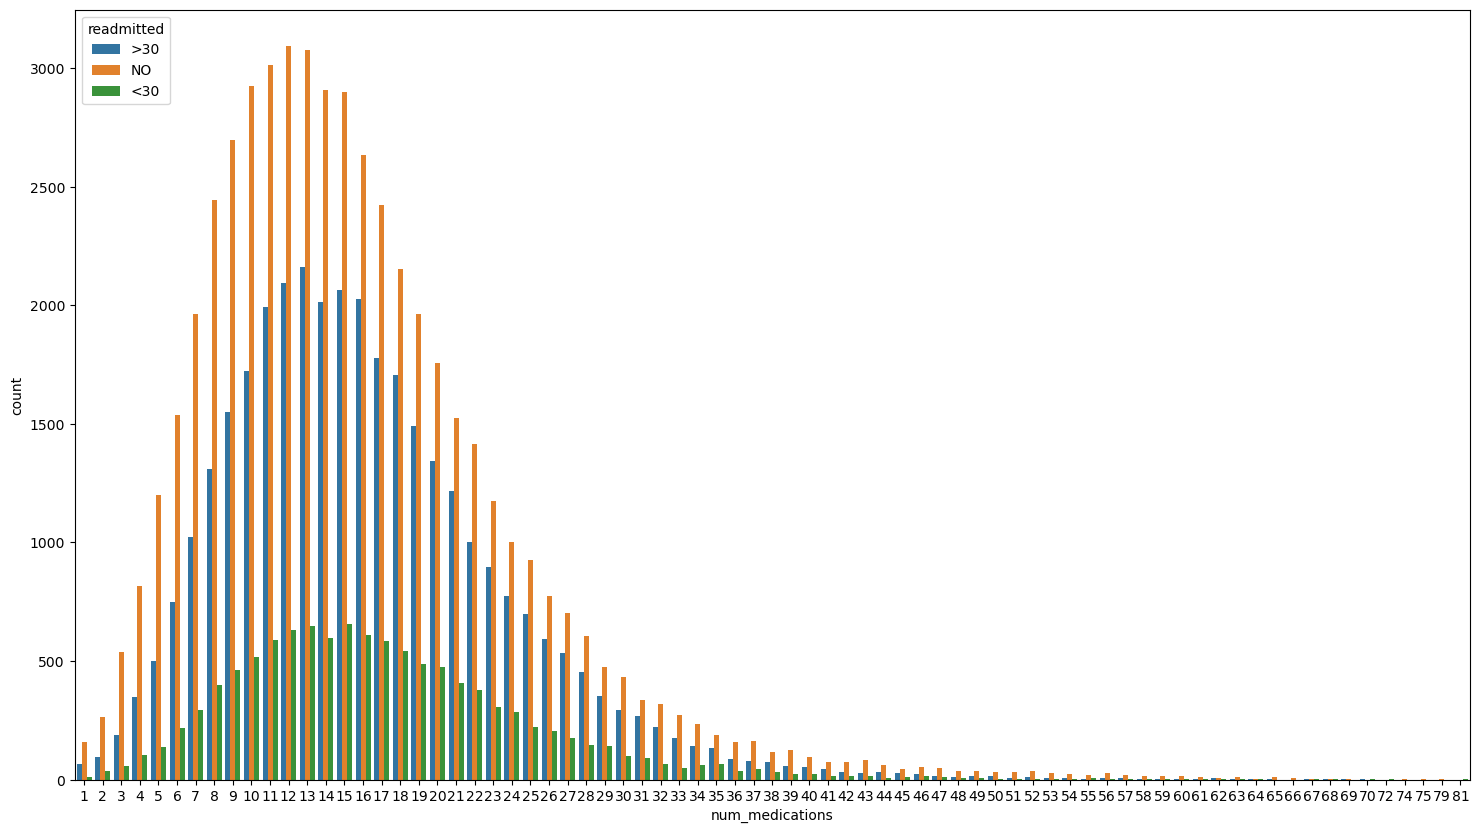

In [101]:
plt.figure(figsize=(18,10))
sns.countplot(data=df,x='num_medications',hue='readmitted')
plt.show();
#this shows readmission directly proportional to age

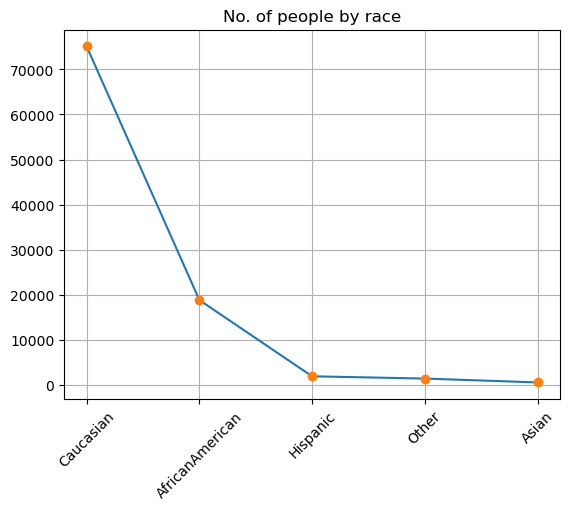

In [102]:
# Visualizing number of patients by race.
plt.title('No. of people by race')
plt.plot(df['race'].value_counts(),'-')
plt.plot(df['race'].value_counts(),'o')
plt.xticks(rotation=45)
plt.grid()
plt.show()

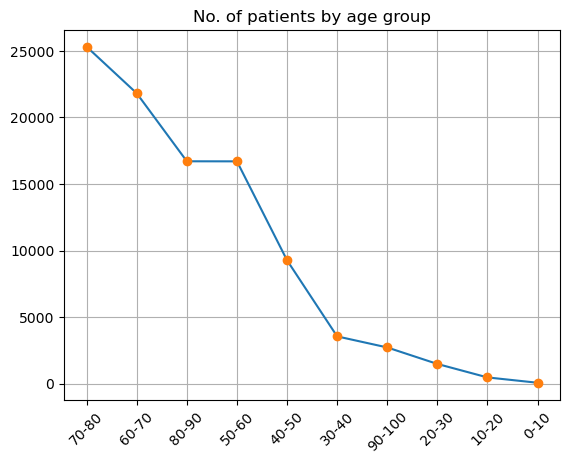

In [103]:
# Graph showing number of patients with regards to their age group.
plt.plot(df['age'].value_counts(),'-')
plt.plot(df['age'].value_counts(),'o')
plt.xticks(rotation=45)
plt.title('No. of patients by age group')
plt.grid()

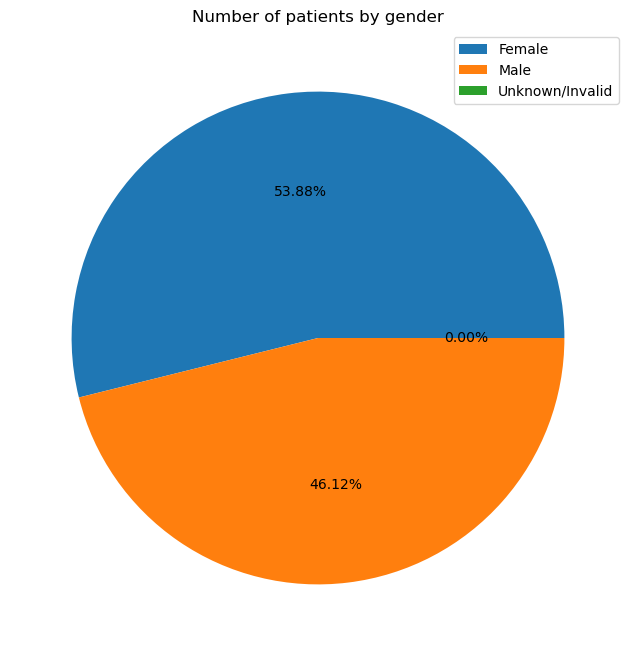

In [104]:
# Visualizing number of patients by gender.
plt.figure(figsize=(8,8))
plt.pie(df['gender'].value_counts(),autopct='%.2f%%')
plt.legend(df['gender'].unique())
plt.title('Number of patients by gender')
plt.show()

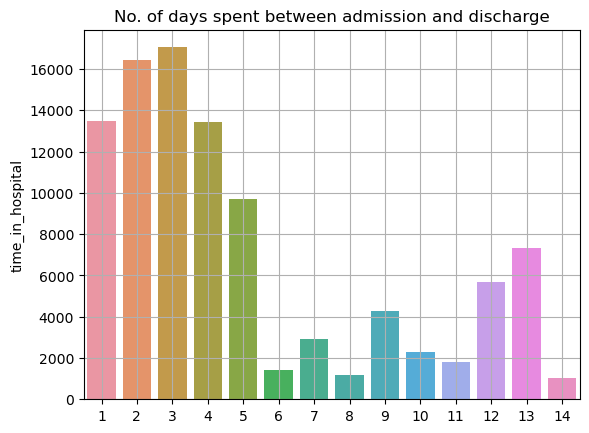

In [105]:
# Graph to show number of days spent by patients
plt.title('No. of days spent between admission and discharge')
sns.barplot(x=df['time_in_hospital'].unique(),y=df['time_in_hospital'].value_counts())
plt.grid()
plt.show()

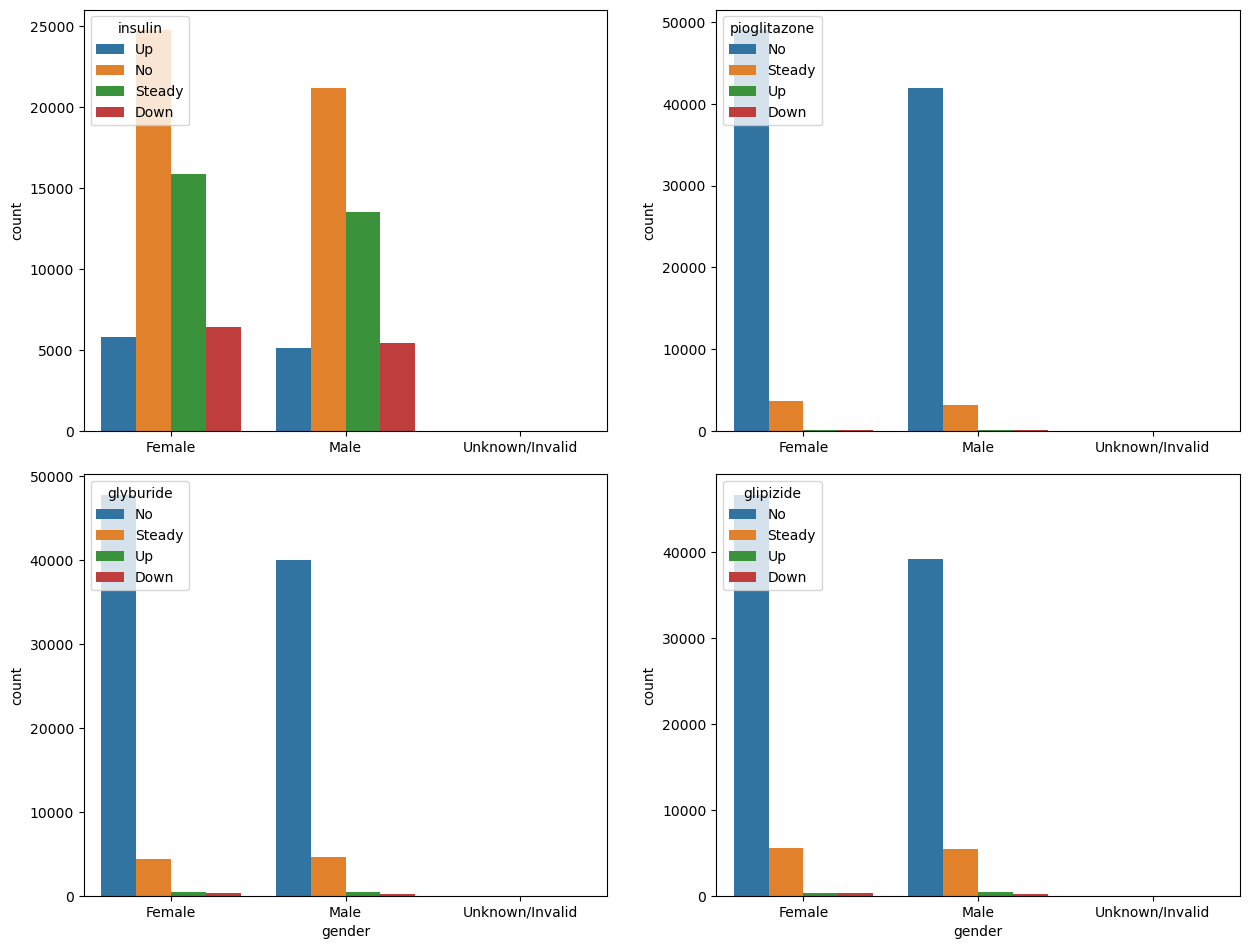

In [106]:
# The subplots showing patients in regards with gender having medicinal levels
fig,axs=plt.subplots(2,2)
#fig.suptitle('Patients in regards with gender having medicinal levels')
sns.countplot(data=df,x='gender',hue='insulin',ax=axs[0,0]).set(xlabel=None)
sns.countplot(data=df,x='gender',hue='pioglitazone',ax=axs[0,1]).set(xlabel=None)
sns.countplot(data=df,x='gender',hue='glyburide',ax=axs[1,0])
sns.countplot(data=df,x='gender',hue='glipizide',ax=axs[1,1])
plt.tight_layout(rect=[0, 0, 2, 2])

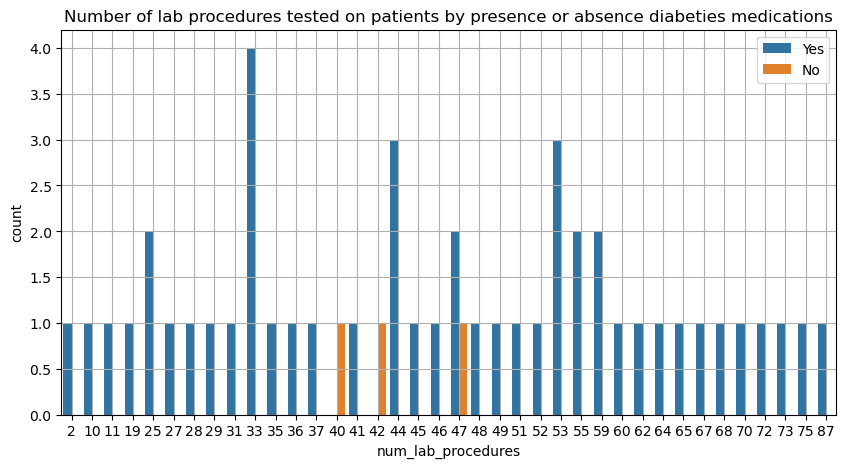

In [107]:
# Graph showing lab procedures tested on patients by presence or absence diabeties medications
plt.figure(figsize=(10,5))
sns.countplot(data=df.head(50),x='num_lab_procedures',hue='diabetesMed')
plt.title('Number of lab procedures tested on patients by presence or absence diabeties medications')
plt.legend(loc='upper right')
plt.grid()

In [108]:
df.describe()   #we can see that the data is hardly skewed so data

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,patient_visit_byencounter,patient_visit_byid
count,9.805300e+04,9.805300e+04,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,261.000000
mean,1.658294e+08,5.484792e+07,2.025813,3.753368,5.776692,4.421976,43.148073,1.350749,16.119650,0.376378,0.202462,0.646864,7.512060,1.225704,1.367816
std,1.024322e+08,3.866175e+07,1.450117,5.309392,4.071640,2.993074,19.712033,1.708506,8.108476,1.283359,0.942892,1.271020,1.832497,2.314734,4.180858
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,8.528566e+07,2.350234e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,1.533019e+08,4.687790e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.305007e+08,8.800306e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,2.000000,1.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,80.000000,39.000000


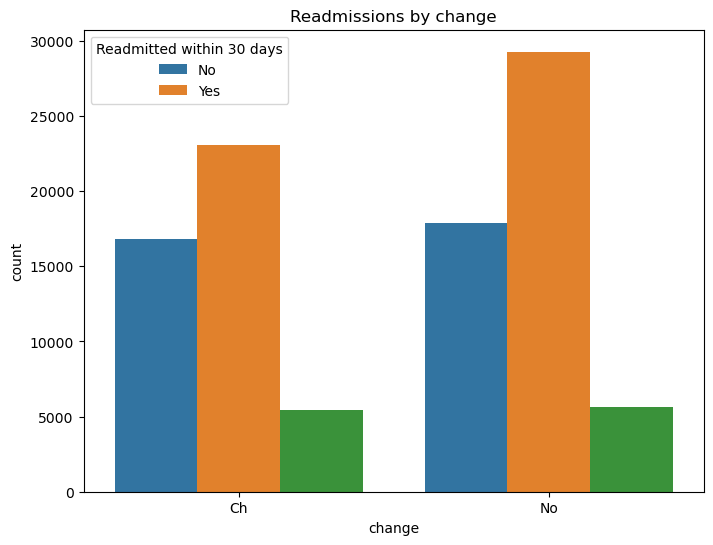

In [109]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'change', hue = 'readmitted', data = df)
plt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.title('Readmissions by change')
plt.show();

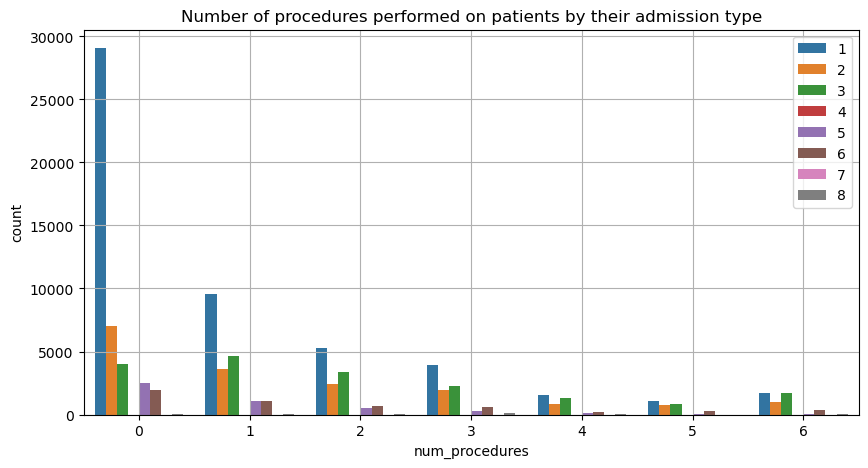

In [110]:
# Graph showing number of procedures performed on patients by their admission type
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='num_procedures',hue='admission_type_id')
plt.legend(loc='upper right')
plt.title('Number of procedures performed on patients by their admission type')
plt.grid()

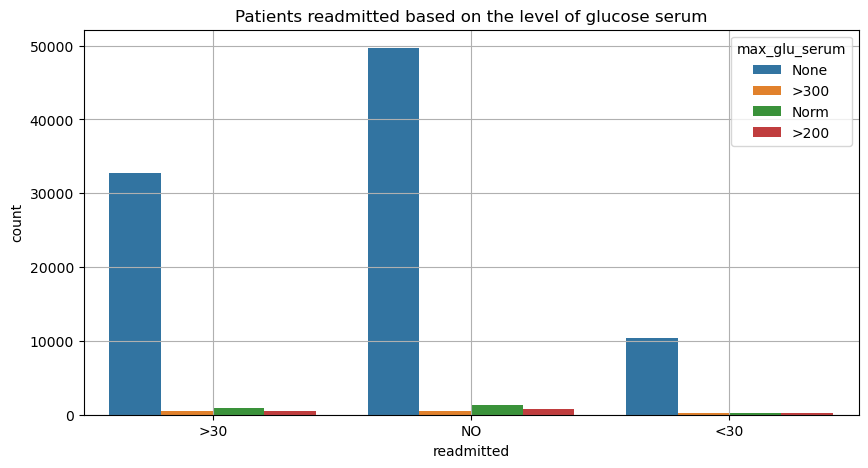

In [111]:
# Graph showing patients readmitted based on the level of glucose serum
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='readmitted',hue='max_glu_serum')
plt.title('Patients readmitted based on the level of glucose serum')
plt.grid()

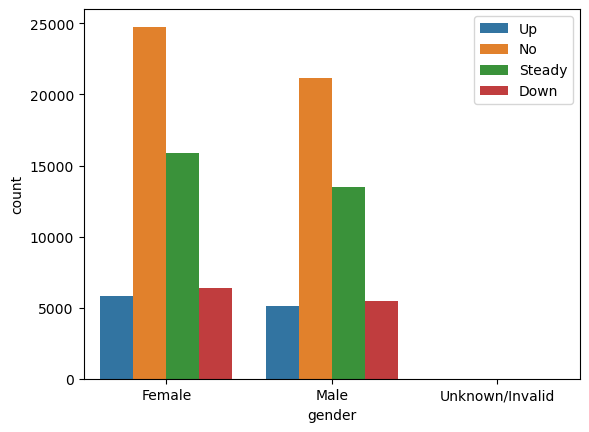

In [112]:
sns.countplot(data=df,x='gender',hue='insulin')
plt.legend(loc='upper right')

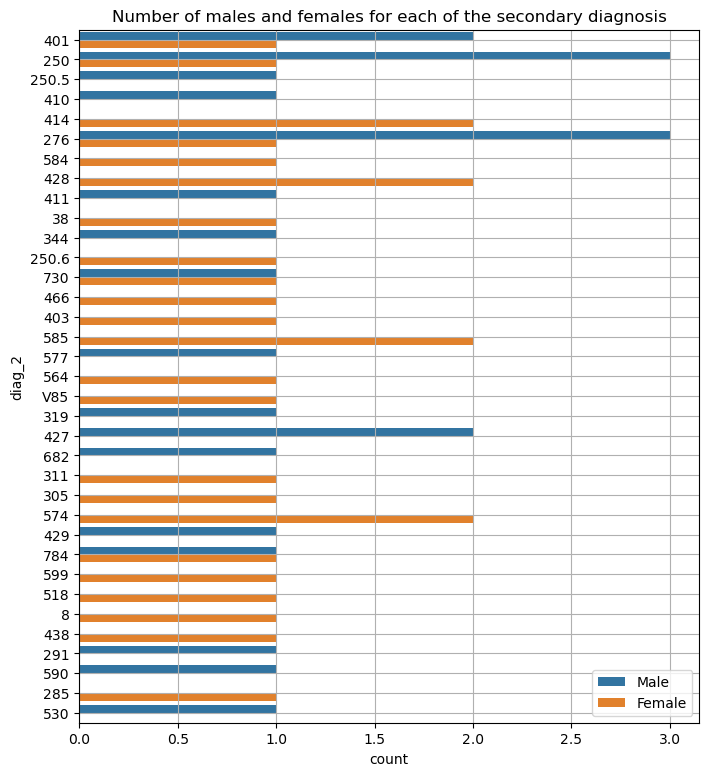

In [113]:
# Graph to show the counts of males and females for each of the secondary diagnosis
plt.figure(figsize=(8,9))
sns.countplot(data=df.tail(50),y='diag_2',hue='gender')
plt.grid()
plt.title('Number of males and females for each of the secondary diagnosis')
plt.legend(loc='lower right')

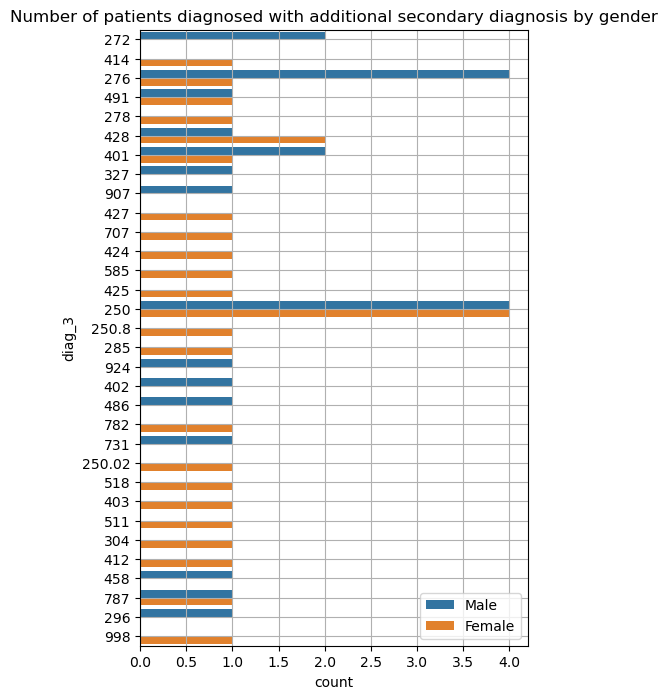

In [114]:
# Graph showing number of patients diagnosed with additional secondary diagnosis by gender
plt.figure(figsize=(5,8))
sns.countplot(data=df.tail(50),y='diag_3',hue='gender')
plt.grid()
plt.title('Number of patients diagnosed with additional secondary diagnosis by gender')
plt.legend(loc='lower right')

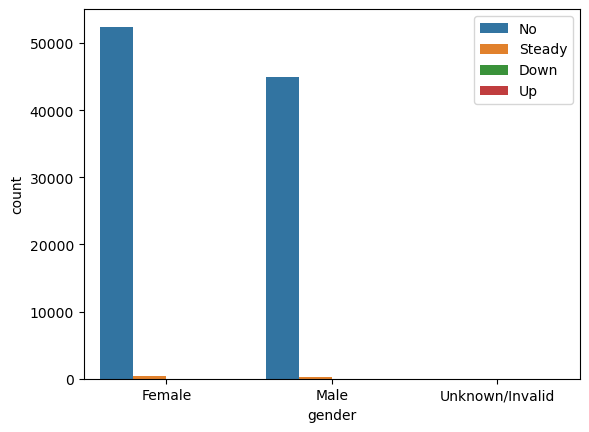

In [115]:
sns.countplot(data=df,x='gender',hue='nateglinide')
plt.legend(loc='upper right')

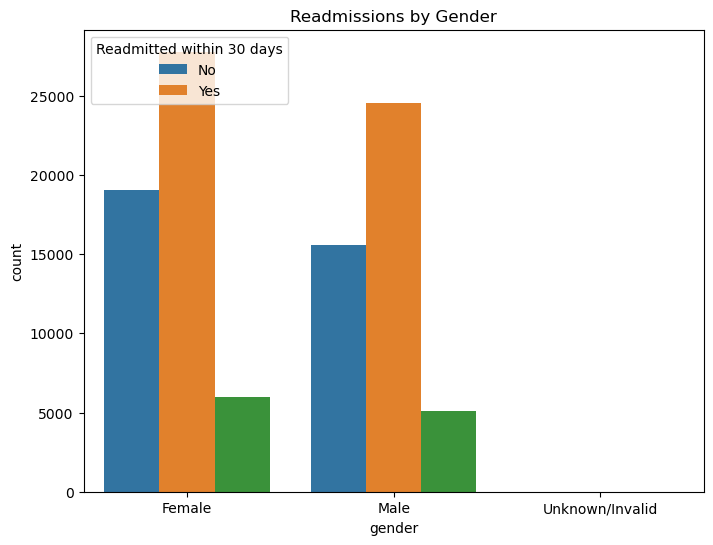

In [116]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'gender', hue = 'readmitted', data = df) 
plt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.title('Readmissions by Gender')
plt.show();

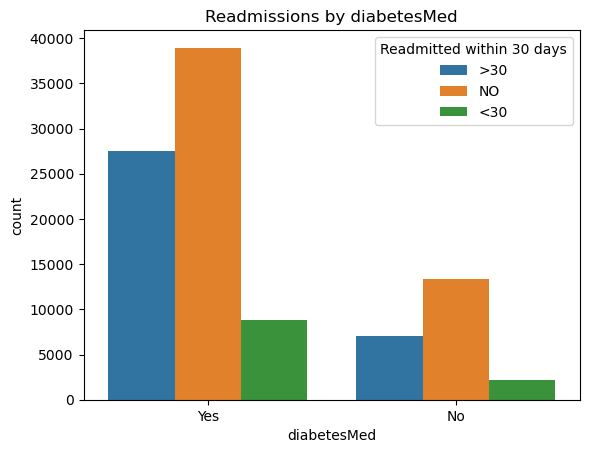

In [117]:
sns.countplot(x = 'diabetesMed', hue = 'readmitted', data = df) 
plt.legend(title = 'Readmitted within 30 days')
plt.title('Readmissions by diabetesMed')
plt.show();

# Preprocessing for ML

In [118]:
catcol=df.select_dtypes(object).columns
catcol

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [119]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [120]:
df[catcol]=oe.fit_transform(df[catcol])
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,patient_visit_byencounter,patient_visit_byid
1,149190,55629189,2.0,0.0,1.0,1,1,7,3,59,...,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,NaN
2,64410,86047875,0.0,0.0,2.0,1,1,7,2,11,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3,NaN
3,500364,82442376,2.0,1.0,3.0,1,1,7,2,44,...,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0,NaN
4,16680,42519267,2.0,1.0,4.0,1,1,7,1,51,...,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0,NaN
5,35754,82637451,2.0,1.0,5.0,2,1,2,3,31,...,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,0.0,1.0,7.0,1,3,7,3,51,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,NaN
101762,443847782,74694222,0.0,0.0,8.0,1,4,5,5,33,...,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1,NaN
101763,443854148,41088789,2.0,1.0,7.0,1,1,7,1,53,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1,NaN
101764,443857166,31693671,2.0,0.0,8.0,2,3,7,10,45,...,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1,NaN


# Corelation and other necessary features

In [121]:
df.describe()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,patient_visit_byencounter,patient_visit_byid
count,9.805300e+04,9.805300e+04,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,...,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,261.000000
mean,1.658294e+08,5.484792e+07,1.659011,0.461189,6.126034,2.025813,3.753368,5.776692,4.421976,43.148073,...,1.401038,1.006823,0.000133,0.000010,0.000010,0.538219,0.768472,1.420915,1.225704,1.367816
std,1.024322e+08,3.866175e+07,0.860882,0.498514,1.559075,1.450117,5.309392,4.071640,2.993074,19.712033,...,0.839098,0.083426,0.011514,0.003194,0.003194,0.498540,0.421811,0.685175,2.314734,4.180858
min,1.252200e+04,1.350000e+02,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.528566e+07,2.350234e+07,2.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,31.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.533019e+08,4.687790e+07,2.000000,0.000000,6.000000,1.000000,1.000000,7.000000,4.000000,44.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000
75%,2.305007e+08,8.800306e+07,2.000000,1.000000,7.000000,3.000000,4.000000,7.000000,6.000000,57.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000
max,4.438672e+08,1.895026e+08,4.000000,2.000000,9.000000,8.000000,28.000000,25.000000,14.000000,132.000000,...,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,80.000000,39.000000


In [122]:
df.corr

<bound method DataFrame.corr of         encounter_id  patient_nbr  race  gender  age  admission_type_id  \
1             149190     55629189   2.0     0.0  1.0                  1   
2              64410     86047875   0.0     0.0  2.0                  1   
3             500364     82442376   2.0     1.0  3.0                  1   
4              16680     42519267   2.0     1.0  4.0                  1   
5              35754     82637451   2.0     1.0  5.0                  2   
...              ...          ...   ...     ...  ...                ...   
101761     443847548    100162476   0.0     1.0  7.0                  1   
101762     443847782     74694222   0.0     0.0  8.0                  1   
101763     443854148     41088789   2.0     1.0  7.0                  1   
101764     443857166     31693671   2.0     0.0  8.0                  2   
101765     443867222    175429310   2.0     1.0  7.0                  1   

        discharge_disposition_id  admission_source_id  time_in_hosp

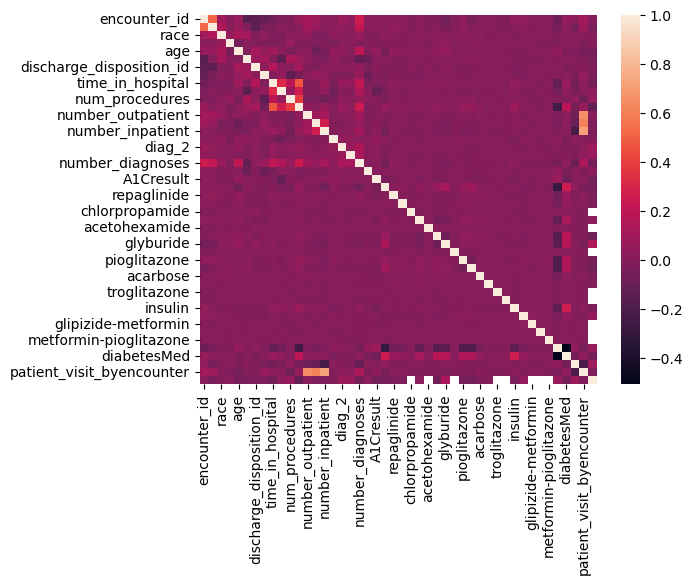

In [123]:
sns.heatmap(df.corr())
plt.show()

In [124]:
# Dropping Columns for ML based on Multi-collinearity
df.drop(columns=["patient_visit_byid"],inplace=True)

# Machine Learning Models

In [125]:
x = df.copy()
x.drop(columns="readmitted",inplace=True)

In [126]:
y = df.readmitted
y

1         1.0
2         2.0
3         2.0
4         2.0
5         1.0
         ... 
101761    1.0
101762    2.0
101763    2.0
101764    2.0
101765    2.0
Name: readmitted, Length: 98053, dtype: float64

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [128]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)
pca = PCA(n_components=15)
xtrain = pca.fit_transform(xtrain)
xtest = pca.fit_transform(xtest)

As we can see the data is not balanced so we have to balance the data so for that we here will use Randomunsaampler for the pocess

In [129]:
# Using Counter for Counting Number of Values
from collections import Counter
print('Original dataset shape {}'.format(Counter(ytrain)))

Original dataset shape Counter({2.0: 36687, 1.0: 24210, 0.0: 7740})


In [130]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(xtrain, ytrain)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(ytest)}")

Training target statistics: Counter({0.0: 7740, 1.0: 7740, 2.0: 7740})
Testing target statistics: Counter({2.0: 15651, 1.0: 10439, 0.0: 3326})


In [131]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    testing = model.score(xtest,ytest)
    
    print(f'Training Score is {train}\n Testing Score is {testing}')
    print(f'Classification Report: {classification_report(ytest,ypred)}')
    return model

In [132]:
# Importing various Algorithms for finding best model for our ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [133]:
mymodel(LogisticRegression())

Training Score is 0.5592756093652111
 Testing Score is 0.5580636388360076
Classification Report:               precision    recall  f1-score   support

         0.0       0.20      0.00      0.00      3326
         1.0       0.49      0.22      0.30     10439
         2.0       0.57      0.90      0.70     15651

    accuracy                           0.56     29416
   macro avg       0.42      0.37      0.33     29416
weighted avg       0.50      0.56      0.48     29416



LogisticRegression()

In [134]:
mymodel(KNeighborsClassifier())

Training Score is 0.6638256334047234
 Testing Score is 0.48133668751699754
Classification Report:               precision    recall  f1-score   support

         0.0       0.15      0.11      0.12      3326
         1.0       0.40      0.40      0.40     10439
         2.0       0.58      0.61      0.60     15651

    accuracy                           0.48     29416
   macro avg       0.38      0.37      0.37     29416
weighted avg       0.47      0.48      0.47     29416



KNeighborsClassifier()

In [135]:
mymodel(DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10))

Training Score is 0.8575403936652243
 Testing Score is 0.4423443024204515
Classification Report:               precision    recall  f1-score   support

         0.0       0.13      0.16      0.15      3326
         1.0       0.38      0.37      0.38     10439
         2.0       0.57      0.55      0.56     15651

    accuracy                           0.44     29416
   macro avg       0.36      0.36      0.36     29416
weighted avg       0.45      0.44      0.45     29416



DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [136]:
mymodel(RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10))

Training Score is 0.8693561781546396
 Testing Score is 0.5230146858852325
Classification Report:               precision    recall  f1-score   support

         0.0       0.23      0.03      0.05      3326
         1.0       0.42      0.36      0.39     10439
         2.0       0.58      0.74      0.65     15651

    accuracy                           0.52     29416
   macro avg       0.41      0.38      0.36     29416
weighted avg       0.48      0.52      0.49     29416



RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [137]:
mymodel(BernoulliNB())

Training Score is 0.5376837565744423
 Testing Score is 0.5331792221920043
Classification Report:               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3326
         1.0       0.43      0.13      0.20     10439
         2.0       0.55      0.91      0.68     15651

    accuracy                           0.53     29416
   macro avg       0.33      0.35      0.30     29416
weighted avg       0.44      0.53      0.44     29416



BernoulliNB()

In [138]:
mymodel(GaussianNB())

Training Score is 0.5303990559027929
 Testing Score is 0.5284199075333152
Classification Report:               precision    recall  f1-score   support

         0.0       0.25      0.10      0.15      3326
         1.0       0.42      0.10      0.17     10439
         2.0       0.55      0.90      0.69     15651

    accuracy                           0.53     29416
   macro avg       0.41      0.37      0.33     29416
weighted avg       0.47      0.53      0.44     29416



GaussianNB()

In [139]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [140]:
mymodel(AdaBoostClassifier())

Training Score is 0.5653801885280534
 Testing Score is 0.5589135164536306
Classification Report:               precision    recall  f1-score   support

         0.0       0.30      0.01      0.01      3326
         1.0       0.48      0.31      0.38     10439
         2.0       0.59      0.84      0.69     15651

    accuracy                           0.56     29416
   macro avg       0.45      0.39      0.36     29416
weighted avg       0.51      0.56      0.50     29416



AdaBoostClassifier()

In [141]:
mymodel(GradientBoostingClassifier())

Training Score is 0.5755642000670192
 Testing Score is 0.5639107968452542
Classification Report:               precision    recall  f1-score   support

         0.0       0.37      0.01      0.02      3326
         1.0       0.50      0.27      0.35     10439
         2.0       0.58      0.88      0.70     15651

    accuracy                           0.56     29416
   macro avg       0.48      0.39      0.36     29416
weighted avg       0.53      0.56      0.50     29416



GradientBoostingClassifier()

In [142]:
mymodel(XGBClassifier())

Training Score is 0.6658216413887553
 Testing Score is 0.5558879521348926
Classification Report:               precision    recall  f1-score   support

         0.0       0.25      0.02      0.03      3326
         1.0       0.47      0.31      0.38     10439
         2.0       0.59      0.83      0.69     15651

    accuracy                           0.56     29416
   macro avg       0.44      0.39      0.37     29416
weighted avg       0.51      0.56      0.50     29416



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [143]:
mymodel(XGBClassifier(max_depth=3))

Training Score is 0.583839620030013
 Testing Score is 0.5639447919499592
Classification Report:               precision    recall  f1-score   support

         0.0       0.44      0.01      0.02      3326
         1.0       0.49      0.29      0.37     10439
         2.0       0.58      0.86      0.70     15651

    accuracy                           0.56     29416
   macro avg       0.51      0.39      0.36     29416
weighted avg       0.53      0.56      0.50     29416



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [144]:
mymodel(XGBClassifier(max_depth=2))

Training Score is 0.5731748182467182
 Testing Score is 0.5645567038346478
Classification Report:               precision    recall  f1-score   support

         0.0       0.48      0.01      0.01      3326
         1.0       0.49      0.28      0.36     10439
         2.0       0.58      0.87      0.70     15651

    accuracy                           0.56     29416
   macro avg       0.52      0.39      0.36     29416
weighted avg       0.54      0.56      0.50     29416



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

ML Model	                          Training Score	Testing Score
Logistic regression	                       0.558	        0.555
Kneighebours Classifier	                   0.662	        0.468
Decision Tree	                           0.861	        0.434
Random Forest	                           0.863	        0.513
Bernoullie NB	                           0.539	        0.533
Gaussian NB	                               0.533	        0.532
ADA Boost	                               0.566	        0.558
Gradient Boost	                           0.576	        0.571
XG boost	                               0.67	            0.549
XG boost  (depth=3)	                       0.585	        0.56
XG boost (depth=2)	                       0.574	        0.561


so after preforming diffrent ml processes we realised the most ideal model for this data is logistic regression model which was bit expected but after using different esembele learing we realised using gaussian NB we get the best model